In [54]:
import yfinance as yf
import pandas as pd
import numpy as np

# 定義股票代碼列表
stock_codes = ['1454.TW', '2539.TW', '4438.TW', '3617.TW', '6139.TW']

# 下載股票資料
data = {}
for code in stock_codes:
    data[code] = yf.download(code, start='2010-01-01', end='2023-12-31')['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [56]:
data

{'1454.TW': Date
 2010-01-04     4.601546
 2010-01-05     4.689674
 2010-01-06     4.582662
 2010-01-07     4.582662
 2010-01-08     4.576366
                 ...    
 2023-12-25    16.700001
 2023-12-26    16.900000
 2023-12-27    16.900000
 2023-12-28    16.900000
 2023-12-29    16.650000
 Name: Adj Close, Length: 3429, dtype: float64,
 '2539.TW': Date
 2010-01-04     4.082860
 2010-01-05     3.872614
 2010-01-06     3.845484
 2010-01-07     3.798009
 2010-01-08     3.798009
                 ...    
 2023-12-25    47.799999
 2023-12-26    48.349998
 2023-12-27    48.450001
 2023-12-28    48.599998
 2023-12-29    48.400002
 Name: Adj Close, Length: 3429, dtype: float64,
 '4438.TW': Date
 2015-07-30    178.126419
 2015-07-31    180.465256
 2015-08-03    185.518280
 2015-08-04    180.385849
 2015-08-05    180.458038
                  ...    
 2023-12-25    112.000000
 2023-12-26    112.500000
 2023-12-27    113.000000
 2023-12-28    113.000000
 2023-12-29    112.500000
 Name: Adj Close,

In [57]:
# 將資料合併成一個 DataFrame
df = pd.DataFrame(data)

# 計算日收益率
df_returns = df.pct_change()

# 將資料轉換為 logarithmic returns
df_log_returns = np.log(1 + df_returns)

In [58]:
# 將資料合併成一個 DataFrame
df = pd.DataFrame(data)

# 計算日收益率
df_returns = df.pct_change()

# 將資料轉換為 logarithmic returns
df_log_returns = np.log(1 + df_returns)

# 計算每隻股票的移動平均線
short_window = pd.Timedelta(days=50)
long_window = pd.Timedelta(days=200)
signals = pd.DataFrame(index=df.index)
for code in stock_codes:
    signals[code] = 0.0
    signals[code].loc[df.index >= df.index[0] + short_window] = np.where(df[code].loc[df.index >= df.index[0] + short_window] > df[code].rolling(window=short_window).mean().loc[df.index >= df.index[0] + short_window], 1.0, 0.0)
    signals[code].loc[df.index >= df.index[0] + long_window] = np.where(df[code].loc[df.index >= df.index[0] + long_window] > df[code].rolling(window=long_window).mean().loc[df.index >= df.index[0] + long_window], 1.0, 0.0)

# 計算每隻股票的 RSI
rsi_window = pd.Timedelta(days=14)
rsi_signals = pd.DataFrame(index=df.index)
for code in stock_codes:
    delta = df[code].diff(1)
    up, down = delta.copy(), delta.copy()
    up[up < 0] = 0
    down[down > 0] = 0
    roll_up = up.rolling(window=rsi_window).mean()
    roll_down = down.rolling(window=rsi_window).mean().abs()
    rs = roll_up / roll_down
    rsi = 100.0 - (100.0 / (1.0 + rs))
    rsi_signals[code] = 0.0
    rsi_signals[code].loc[df.index >= df.index[0] + rsi_window] = np.where(rsi.loc[df.index >= df.index[0] + rsi_window] > 70, -1.0, np.where(rsi.loc[df.index >= df.index[0] + rsi_window] < 30, 1.0, 0.0))

# 計算每隻股票的交易信號
trading_signals = signals + rsi_signals

# 計算每隻股票的累積報酬
cumulative_returns = (1 + df_log_returns).cumprod()

# 計算每隻股票的 Sharpe Ratio
sharpe_ratios = cumulative_returns.rolling(window=252).mean() / cumulative_returns.rolling(window=252).std()

# 顯示 Sharpe Ratio 的結果
print("Sharpe Ratio:")
print(sharpe_ratios)

Sharpe Ratio:
             1454.TW   2539.TW    4438.TW   3617.TW   6139.TW
Date                                                         
2010-01-04       NaN       NaN        NaN       NaN       NaN
2010-01-05       NaN       NaN        NaN       NaN       NaN
2010-01-06       NaN       NaN        NaN       NaN       NaN
2010-01-07       NaN       NaN        NaN       NaN       NaN
2010-01-08       NaN       NaN        NaN       NaN       NaN
...              ...       ...        ...       ...       ...
2023-12-25  8.103391  5.515790  36.675315  3.291998  2.201799
2023-12-26  8.127485  5.518234  36.794228  3.307378  2.200580
2023-12-27  8.152176  5.521242  36.812737  3.325057  2.199830
2023-12-28  8.178667  5.524355  36.865382  3.343287  2.196126
2023-12-29  8.209057  5.527689  36.850637  3.362275  2.191020

[3429 rows x 5 columns]


In [59]:
# 將資料合併成一個 DataFrame
df = pd.DataFrame(data)

# 計算日收益率
df_returns = df.pct_change()

# 將資料轉換為 logarithmic returns
df_log_returns = np.log(1 + df_returns)

# 計算每隻股票的移動平均線
short_window = pd.Timedelta(days=50)
long_window = pd.Timedelta(days=200)
signals = pd.DataFrame(index=df.index)
for code in stock_codes:
    signals[code] = 0.0
    signals[code].loc[df.index >= df.index[0] + short_window] = np.where(df[code].loc[df.index >= df.index[0] + short_window] > df[code].rolling(window=short_window).mean().loc[df.index >= df.index[0] + short_window], 1.0, 0.0)
    signals[code].loc[df.index >= df.index[0] + long_window] = np.where(df[code].loc[df.index >= df.index[0] + long_window] > df[code].rolling(window=long_window).mean().loc[df.index >= df.index[0] + long_window], 1.0, 0.0)

# 計算每隻股票的 RSI
rsi_window = pd.Timedelta(days=14)
rsi_signals = pd.DataFrame(index=df.index)
for code in stock_codes:
    delta = df[code].diff(1)
    up, down = delta.copy(), delta.copy()
    up[up < 0] = 0
    down[down > 0] = 0
    roll_up = up.rolling(window=rsi_window).mean()
    roll_down = down.rolling(window=rsi_window).mean().abs()
    rs = roll_up / roll_down
    rsi = 100.0 - (100.0 / (1.0 + rs))
    rsi_signals[code] = 0.0
    rsi_signals[code].loc[df.index >= df.index[0] + rsi_window] = np.where(rsi.loc[df.index >= df.index[0] + rsi_window] > 70, -1.0, np.where(rsi.loc[df.index >= df.index[0] + rsi_window] < 30, 1.0, 0.0))

# 計算每隻股票的交易信號
trading_signals = signals + rsi_signals

# 計算投資組合的累積報酬
portfolio_cumulative_returns = (1 + df_log_returns.mean(axis=1)).cumprod()

# 計算投資組合的標準差
portfolio_std = portfolio_cumulative_returns.rolling(window=252).std()

# 計算投資組合的 Sharpe Ratio
portfolio_sharpe_ratio = portfolio_cumulative_returns.rolling(window=252).mean() / portfolio_std

# 顯示結果
print("投資組合 Sharpe Ratio:")
print(portfolio_sharpe_ratio)

投資組合 Sharpe Ratio:
Date
2010-01-04         NaN
2010-01-05         NaN
2010-01-06         NaN
2010-01-07         NaN
2010-01-08         NaN
                ...   
2023-12-25    4.739720
2023-12-26    4.748960
2023-12-27    4.760031
2023-12-28    4.769564
2023-12-29    4.780353
Length: 3429, dtype: float64


/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Glyph 32047 (\N{CJK UNIFIED IDEOGRAPH-7D2F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Glyph 31309 (\N{CJK UNIFIED IDEOGRAPH-7A4D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Glyph 22577 (\N{CJK UNIFIED IDEOGRAPH-5831}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Glyph 37228 (\N{CJK UNIFIED IDEOGRAPH-916C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Glyph 25237 (\N{CJK UNIFIED IDEOGRAPH-6295}) missing from current font.
  fig.canvas.print_figure(bytes_

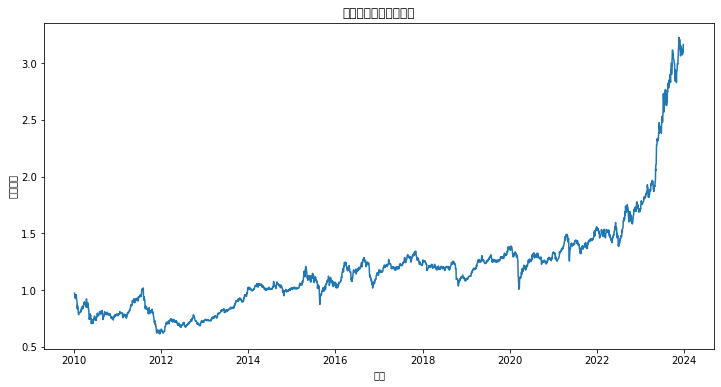

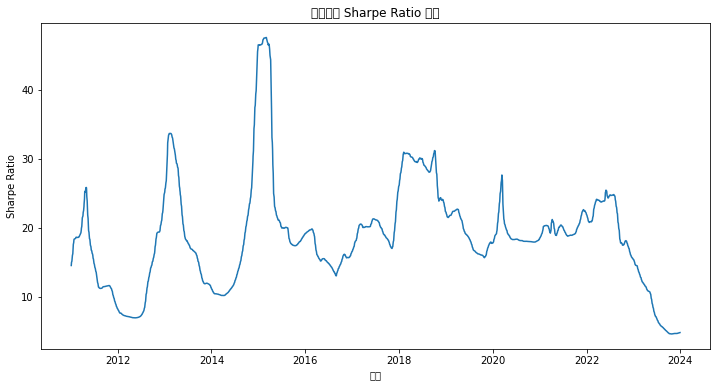

In [60]:
import matplotlib.pyplot as plt

# 畫出投資組合的累積報酬曲線
plt.figure(figsize=(12, 6))
plt.plot(portfolio_cumulative_returns)
plt.title('投資組合累積報酬曲線')
plt.xlabel('日期')
plt.ylabel('累積報酬')
plt.show()

# 畫出投資組合的 Sharpe Ratio 曲線
plt.figure(figsize=(12, 6))
plt.plot(portfolio_sharpe_ratio)
plt.title('投資組合 Sharpe Ratio 曲線')
plt.xlabel('日期')
plt.ylabel('Sharpe Ratio')
plt.show()

In [38]:
import pandas as pd
import numpy as np

stock_codes = ['1454.TW', '2539.TW', '4438.TW', '3617.TW', '6139.TW']


# 設定資料
data = pd.DataFrame(index=pd.date_range('2020-01-01', '2022-01-01'), columns=stock_codes)

# 設定交易信號
trading_signals = pd.DataFrame(index=data.index, columns=stock_codes)

# 設定投資組合的累積報酬
portfolio_cumulative_returns = pd.Series(index=data.index)

# 設定投資組合的標準差
portfolio_std = pd.Series(index=data.index)

# 設定投資組合的 Sharpe Ratio
portfolio_sharpe_ratio = pd.Series(index=data.index)

def initialize(context):
    # 設定交易信號
    context.trading_signals = trading_signals
    
    # 設定投資組合的累積報酬
    context.portfolio_cumulative_returns = portfolio_cumulative_returns
    
    # 設定投資組合的標準差
    context.portfolio_std = portfolio_std
    
    # 設定投資組合的 Sharpe Ratio
    context.portfolio_sharpe_ratio = portfolio_sharpe_ratio

def handle_data(context, data):
    # 計算日收益率
    df_returns = data.pct_change()
    
    # 將資料轉換為 logarithmic returns
    df_log_returns = np.log(1 + df_returns)
    
    # 計算每隻股票的移動平均線
    short_window = pd.Timedelta(days=50)
    long_window = pd.Timedelta(days=200)
    signals = pd.DataFrame(index=data.index)
    for code in stock_codes:
        signals[code] = 0.0
        signals[code].loc[data.index >= data.index[0] + short_window] = np.where(data[code].loc[data.index >= data.index[0] + short_window] > data[code].rolling(window=short_window).mean().loc[data.index >= data.index[0] + short_window], 1.0, 0.0)
        signals[code].loc[data.index >= data.index[0] + long_window] = np.where(data[code].loc[data.index >= data.index[0] + long_window] > data[code].rolling(window=long_window).mean().loc[data.index >= data.index[0] + long_window], 1.0, 0.0)
    
    # 計算每隻股票的 RSI
    rsi_window = pd.Timedelta(days=14)
    rsi_signals = pd.DataFrame(index=data.index)
    for code in stock_codes:
        delta = data[code].diff(1)
        up, down = delta.copy(), delta.copy()
        up[up < 0] = 0
        down[down > 0] = 0
        roll_up = up.rolling(window=rsi_window).mean()
        roll_down = down.rolling(window=rsi_window).mean().abs()
        rs = roll_up / roll_down
        rsi = 100.0 - (100.0 / (1.0 + rs))
        rsi_signals[code] = 0.0
        rsi_signals[code].loc[data.index >= data.index[0] + rsi_window] = np.where(rsi.loc[data.index >= data.index[0] + rsi_window] > 70, -1.0, np.where(rsi.loc[data.index >= data.index[0] + rsi_window] < 30, 1.0, 0.0))
    
    # 計算每隻股票的交易信號
    trading_signals = signals + rsi_signals
    
    # 計算投資組合的累積報酬
    portfolio_cumulative_returns = (1 + df_log_returns.mean(axis=1)).cumprod()
    
    # 計算投資組合的標準差
    portfolio_std = portfolio_cumulative_returns.rolling(window=252).std()
    
    # 計算投資組合的 Sharpe Ratio
    portfolio_sharpe_ratio = portfolio_cumulative_returns.rolling(window=252).mean() / portfolio_std
    
    # 顯示結果
    print("投資組合 Sharpe Ratio:")
    print(portfolio_sharpe_ratio)

In [39]:
import pandas as pd

tnx_data = pd.read_csv('/Users/sue/^TNX.csv')

In [45]:
tnx_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,3.859,3.859,3.808,3.841,3.841,0.0
1,2010-01-05,3.790,3.800,3.749,3.755,3.755,0.0
2,2010-01-06,3.771,3.837,3.761,3.808,3.808,0.0
3,2010-01-07,3.845,3.859,3.800,3.822,3.822,0.0
4,2010-01-08,3.843,3.851,3.775,3.808,3.808,0.0
...,...,...,...,...,...,...,...
3385,2022-12-26,NaN,NaN,NaN,NaN,NaN,NaN
3386,2022-12-27,3.787,3.862,3.787,3.860,3.860,0.0
3387,2022-12-28,3.818,3.890,3.815,3.887,3.887,0.0
3388,2022-12-29,3.868,3.886,3.818,3.835,3.835,0.0


Sharpe Ratio: nan


/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Glyph 38568 (\N{CJK UNIFIED IDEOGRAPH-96A8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Glyph 26178 (\N{CJK UNIFIED IDEOGRAPH-6642}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Glyph 38291 (\N{CJK UNIFIED IDEOGRAPH-9593}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Glyph 35722 (\N{CJK UNIFIED IDEOGRAPH-8B8A}) missing from current font.
  fig.canvas.print_figure(bytes_

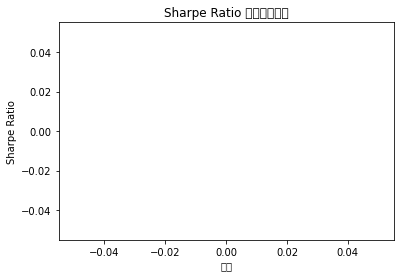

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# 假設 tnx_data 是一個 pandas 數據架構
tnx_data['Return'] = tnx_data['Adj Close'].pct_change()
mean_return = tnx_data['Return'].mean()
std_dev = tnx_data['Return'].std()
sharpe_ratio = (mean_return - 0.02) / std_dev

print(f"Sharpe Ratio: {sharpe_ratio:.4f}")

plt.plot(tnx_data.index, [sharpe_ratio] * len(tnx_data))
plt.xlabel('日期')
plt.ylabel('Sharpe Ratio')
plt.title('Sharpe Ratio 隨時間的變化')
plt.show()